## Linear Support Vector Regression

In [2]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.svm import SVR, SVC # suport vector regression / classification
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE # 2차원으로 축소, 주로 시각화에 활용(비슷한 구조끼리 데이터를 정리하여 구조 이해 도움)

In [6]:
import warnings
warnings.filterwarnings("ignore")

### 보스턴 주택 가격

In [7]:
x, y = load_boston(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [8]:
model = SVR(kernel='linear')
model.fit(x_train, y_train)

SVR(kernel='linear')

In [10]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.7040134559089424
Test Data Score: 0.7016622165495374


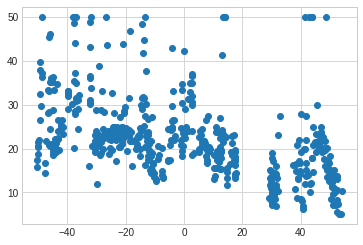

In [11]:
x_comp = TSNE(n_components=1).fit_transform(x) # 저차원 변환
plt.scatter(x_comp, y); # 시각화

In [13]:
x.shape

(506, 13)

In [12]:
x_comp.shape

(506, 1)

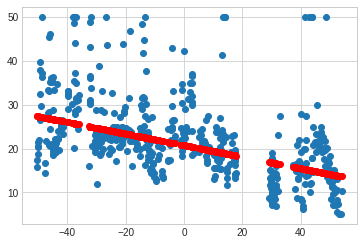

In [14]:
model.fit(x_comp, y)
predict = model.predict(x_comp)
plt.scatter(x_comp, y)
plt.scatter(x_comp, predict, color = 'r')

In [ ]:
from sklearn.manifold import U

In [20]:
predict.shape

(506,)

In [21]:
y.shape

(506,)

In [18]:
# model.score()

<bound method RegressorMixin.score of SVR(kernel='linear')>

In [15]:
# pip라인 생성(SS -> SVR)

In [23]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

result = cross_validate(
    estimator=estimator,
    X=x, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.9s finished


{'fit_time': array([0.05482483, 0.02545071, 0.02184963, 0.02362633, 0.0314486 ]),
 'score_time': array([0.00776291, 0.00299668, 0.00318456, 0.00289774, 0.00286555]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [26]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

result = cross_validate(
    estimator=estimator,
    X=x, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


In [28]:
result["test_score"].mean()

0.4548213708618324

In [29]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],
               'model__epsilon': [1.0, 0.1, 0.01]}] # magin 의 폭 지정(값이 커질수록 폭도 커지게된다. -> hard vs soft)

gs = GridSearchCV(
    estimator=pipe, param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(x, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [30]:
gs.best_estimator_ # 가장 성능이 좋은 model 

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])

### 실습 당뇨병
- 당뇨병 데이터를 이용해 다음과 같은 과정을 수행해 보세요
- TSNE 을 이용해 저차원 변경후 시각화
- cross_validate 를 이용한 기본 model 성능 측정
- GridSearchCV 를 이용한 최적의 Parameter 추정 

In [31]:
x, y = load_diabetes(return_X_y= True)

## Kernel SVR

### 보스턴 주택 가격

In [ ]:
x, y = load_boston(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = SVR(kernel='rbf')
model.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

학습 데이터 점수: 0.6957839889671082
평가 데이터 점수: 0.5625966072712547


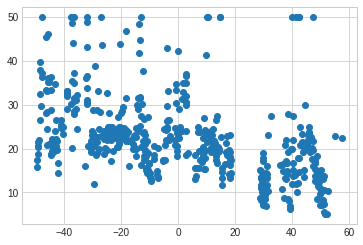

In [ ]:
x_comp = TSNE(n_components=1).fit_transform(x)
plt.scatter(x_comp, y)

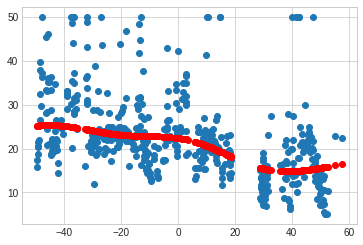

In [ ]:
model.fit(x_comp, y)
predict = model.predict(x_comp)
plt.scatter(x_comp, y)
plt.scatter(x_comp, predict, color = 'r');

In [ ]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))

cross_validate(
    estimator=estimator,
    x=x, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.02737093, 0.04157233, 0.01937795, 0.03211093, 0.01912761]),
 'score_time': array([0.00357342, 0.00364399, 0.00425601, 0.00306058, 0.00347495]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator=pipe, param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(x, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [ ]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
'model__C': [1.0, .1, .01],
'model__epsilon': [1, .1, .01]}]

gs = GridSearchCV(
    estimator=pipe, param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(x, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1, 0.1, 0.01],
                          'model__gamma': 

In [ ]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### 당뇨병

In [32]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

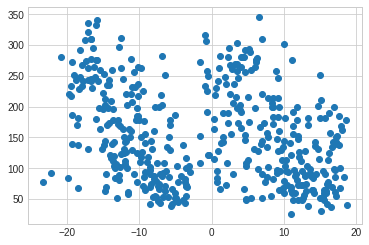

In [35]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

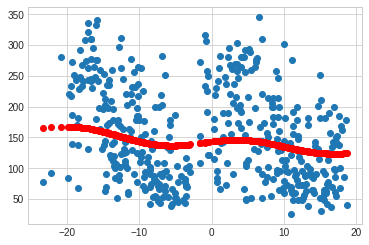

In [36]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color = 'r');

In [37]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))

cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.1s finished


{'fit_time': array([0.01698375, 0.01773715, 0.01527333, 0.01436615, 0.01360631]),
 'score_time': array([0.00479126, 0.02107549, 0.00471139, 0.00443077, 0.00282502]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [38]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator=pipe, 
    param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [39]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])

In [45]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='sigmoid'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
'model__C': [1.0, .1, .01],
'model__epsilon': [1, .1, .01]}]

gs = GridSearchCV(
    estimator=pipe, param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [46]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=0.01, gamma='auto', kernel='sigmoid'))])

In [47]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid'],
               'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, .1, .01],
               'model__epsilon': [1, .1, .01]}]


gs = GridSearchCV(
    estimator=pipe, 
    param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [48]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=0.01, gamma='auto', kernel='sigmoid'))])

In [49]:
model = gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=0.01, gamma='auto', kernel='sigmoid'))])

In [50]:
print(f'Train Data Score: {model.score(X_train, y_train)}')
print(f'Test Data Score: {model.score(X_test, y_test)}')

Train Data Score: 0.4037112049013113
Test Data Score: 0.3478619605063129


## Linear SVC

### 유방암

In [55]:
x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [56]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [57]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [58]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.9846153846153847
Test Data Score: 0.9736842105263158


In [59]:
def make_meshgrid(x, y, h=.2):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  return xx, yy

In [64]:
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [62]:
x_comp = TSNE(n_components=2).fit_transform(x) # 저차원 변환
x0, x1 = x_comp[:, 0], x_comp[:, 1]
xx, yy = make_meshgrid(x0, x1)

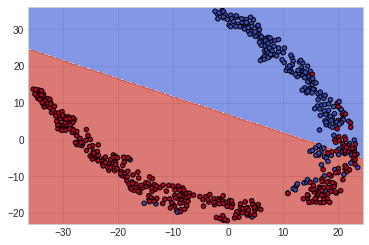

In [65]:
model.fit(x_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [67]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

cross_validate(
    estimator=estimator,
    X=x, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.01002336, 0.01347828, 0.0077734 , 0.00597668, 0.00664878]),
 'score_time': array([0.0012331 , 0.00130987, 0.0012114 , 0.00113821, 0.00120521]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [68]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator=pipe, 
    param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(x, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [69]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

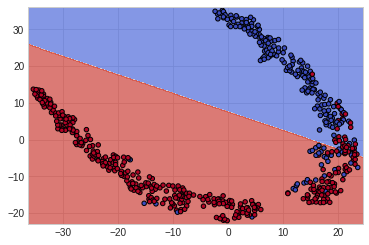

In [71]:
model = gs.best_estimator_
model.fit(x_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [75]:
model.score(x_comp, y)

0.8822495606326889

### 붓꽃

## Kernel SVC

### 유방암

In [ ]:
x, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = SVC(kernel='rbf')
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

학습 데이터 점수: 0.9846153846153847
평가 데이터 점수: 0.9912280701754386


In [ ]:
x_comp = TSNE(n_components=2).fit_transform(x)
x0, x1 = x_comp[:, 0], x_comp[:, 1]
xx, yy = make_meshgrid(x0, x1)

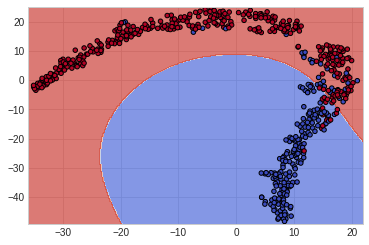

In [ ]:
model.fit(x_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [ ]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))

cross_validate(
    estimator=estimator,
    x=x, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.00752592, 0.0070262 , 0.01560569, 0.01018143, 0.00756121]),
 'score_time': array([0.0016675 , 0.00528979, 0.0018239 , 0.00907063, 0.00221181]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator=pipe, 
    param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(x, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Done  12 out of  15 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [ ]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### 붓꽃

In [ ]:
x, y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

# best model : "rbf"

# 정리

## 와인 DataSet을 이용해 다음과 같은 과정을 수행해 보세요
- StandardScaler 적용후 SVC를 이용해 model 분류 (kenel = rbf)


In [79]:
x, y = load_wine(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [96]:
x.shape

(178, 13)

In [81]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler .transform(x_train) # fit은 위 코드에서 수행했으므로 transform만 실행
x_test = scaler.transform(x_test)

In [83]:
model = SVC(kernel='rbf')
model.fit(x_train, y_train)

SVC()

In [84]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')
# 13차원의 데이터를 이용해 score 측정

Train Data Score: 1.0
Test Data Score: 1.0


In [85]:
x_comp = TSNE(n_components=2).fit_transform(x) # 저차원 변환
X0, X1 = x_comp[:, 0], x_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

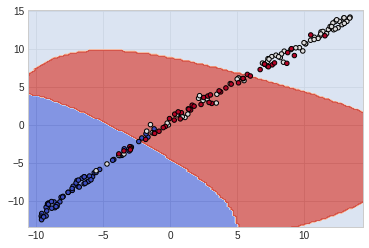

In [87]:
model.fit(x_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [97]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))

cross_validate(
    estimator=estimator,
    X=x, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.1s finished


{'fit_time': array([0.00398421, 0.00385189, 0.0036571 , 0.00381899, 0.0032742 ]),
 'score_time': array([0.00116873, 0.00105619, 0.00106883, 0.00109696, 0.00112891]),
 'test_score': array([1.        , 0.97222222, 0.94444444, 1.        , 1.        ])}

In [98]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator=pipe, 
    param_grid = param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
    )

gs.fit(x, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [100]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])

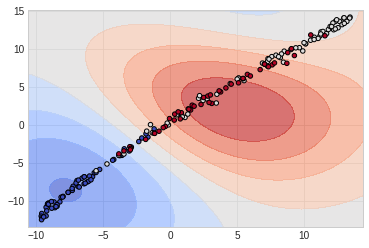

In [101]:
model = gs.best_estimator_
model.fit(x_comp, y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [103]:
model.score(x_comp, y)
# TSNE 을 이용해 저차원(2차원)으로 압축후 model score 측정 

0.5627802459217162